# Regression

Machine learning can be supervised or unsupervised; when labels are given it is considered to be supervised, otherwise unsupuervised. 

Supervised machine learning involves training a model on *features* to predict a *label*. During the training process, a function that suits current observations is derived, and this function can then be used to predict unknown values.

$$y=f(x)$$

This is the simplest type of function. Like the one we had seen in the ice-cream sales. The *y* was the sales and the *x* was the temperature. So if we input *x* the temperature, it will give us a prediction of the sales *y*.

However, in most cases *x* is usually a vector that has multiple features, so the function could be expressed like:

$$y=f([x_1, x_2, x_3, ..., x_n])$$

The aim of regression is to prepare a function that accepts multiple *x* values and predicts *y* as accurately as possible.

There are various machine learning algorithms for supervised learning, mainly:
- **Regression** - Algorithms that predict a y numeric value. For instance, we give the number of bedrooms, location, and square metres of a house and it gives us the price.
- **Classification** - Algorithms that predict to which category (or class) an observation belongs. Usually the y in this case ranges from 0 to 1 determining the probability of the item belonging to a particular class. For instance, we give the number of bedrooms, location, and square metres of a house and it tells us if it's an apartment or a villa.

## Data Exploration

For this example a car data set will be used; this was obtained from __[here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)__. 

The first step is to explore the data to understand how it is structured, find missing values, and any correlation between the features and labels. There might be some issues that need to be fixed, such as deleting rows, adding column headers, filling in missing values, dealing with outliers... In certain cases new features might have to be created (*feature engineering*), data might have to be normalised, and categorical values might have to be encoded into numerical values.

### Loading the data

In this case the data is split into two files:
- `auto-mpg.data` - The actual data is stored in this file
- `auto-mpg.names` - This had information about the file and the name of the columns as well.

So, in this case when we load the data we will not have column headers, and must be added later on.

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Now, let's add the headers to the data frame. These are found in the metadata file.

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Cleaning the data

An overall view of the attributes found in this file:

|Attribute|Type|Description|
| --- | --- | --- |
| mpg | continuous | Number of miles per gallon |
| cylinders | multi-valued discrete | The more cylinders a car has the more power is produced to move the car | 
| displacement | continuous | The measure of cylinder volume swept by all the pistons. Usually this is referred to as the engine size | 
| horsepower | continuous | Indicates the power produced by a car's engine |
| weight | continuous | The weight of the car |
| acceleration | continuous | Seconds to go from 0 to 60 miles per hour | 
| modelYear | multi-valued discrete | The year in which the model was released |
| origin | multi-valued discrete | The country of origin of the car; in this case they are codes for countries |
| carName | string (unique) | The name of the car

In this dataset the label (*y* value) is the mpg. This is what we must predict. All the other attributes are the potential features (*x* values).

Let's start with a quick describe to check that the numerical features are loaded correctly.

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


You might have noticed that `horsepower` is not there. Let's see if there's a problem with it.

count       398
unique       94
top       150.0
freq         22
Name: horsepower, dtype: object

It shows that it is an object rather than numeric. Probably there are different characters from numbers. Let's check.

100.0    17
102.0     1
103.0     1
105.0    12
107.0     1
         ..
95.00    14
96.00     3
97.00     9
98.00     2
?         6
Name: horsepower, Length: 94, dtype: int64

We can see there is a `?` included with the numbers. For this example we will be removing all records that have a `?` in their horsepower column.

### Adding features to the data

Sometimes you can perform *feature engineering*. In this case let's add a label based on acceleration. First we see its distribution, then we assign a label to have three different groups.

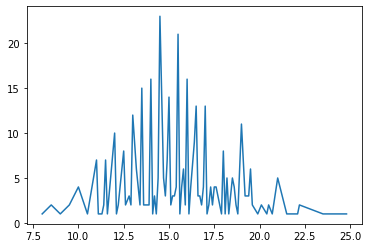

### Basic data exploration

Now we can start with a basic descriptive analysis. We can use `describe` for this.

,horsepower,displacement,weight,acceleration,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,104.469388,194.411990,2977.584184,15.541327,23.445918
std,38.491160,104.644004,849.402560,2.758864,7.805007
min,46.000000,68.000000,1613.000000,8.000000,9.000000
25%,75.000000,105.000000,2225.250000,13.775000,17.000000
50%,93.500000,151.000000,2803.500000,15.500000,22.750000
75%,126.000000,275.750000,3614.750000,17.025000,29.000000
max,230.000000,455.000000,5140.000000,24.800000,46.600000


If we look at these statistics, we can have the following observations:
- There are 398 records (count)
- We have the mean, standard deviation, minimum, maximum and quartiles for each attribute
- For the quartiels, we have the valeus for the 25%, the 50% (which is also the median), and then the 75%. 
- As for out target (mpg) we can see that the mean is 23.51 and it has a standard deviation of 7.81

Let's visualise the data for a better understanding.

Text(0.5, 0.98, 'Overall MPG')

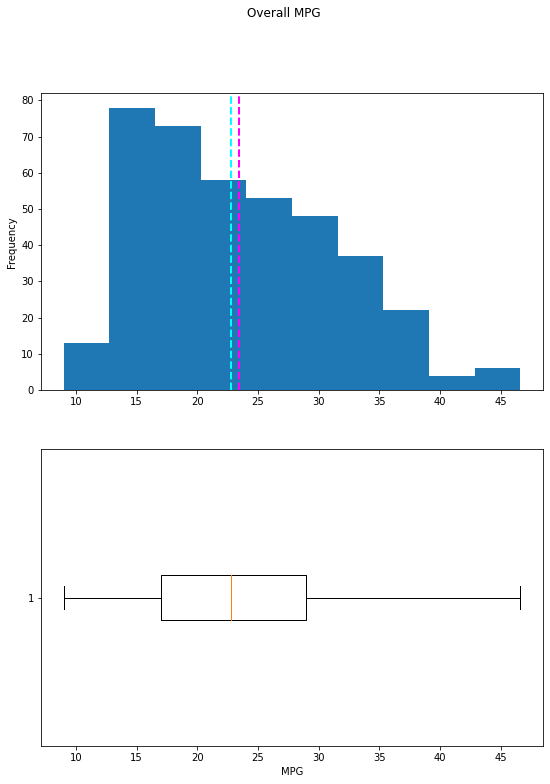

The plots show that mpg varies from 9 to around 46. The median and mean are 23 and 23.5 respectively. There seems to be an outlier with a very high amount of mpg.

### Analysing the features in more detail

Now, we can iterate over the numeric features and produce a chart for each of them to have a better understanding how these are distributed.

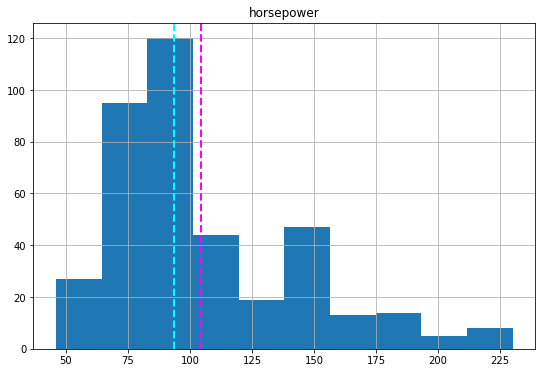

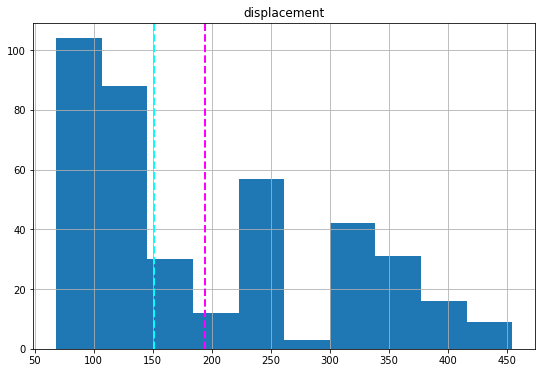

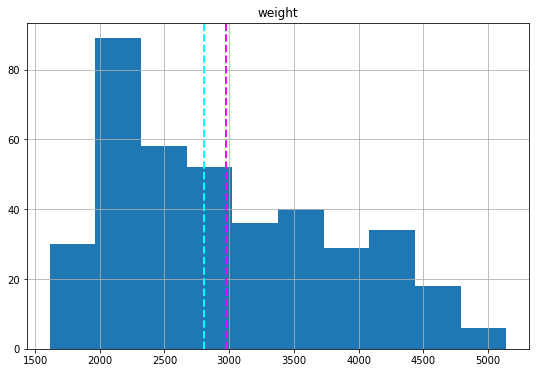

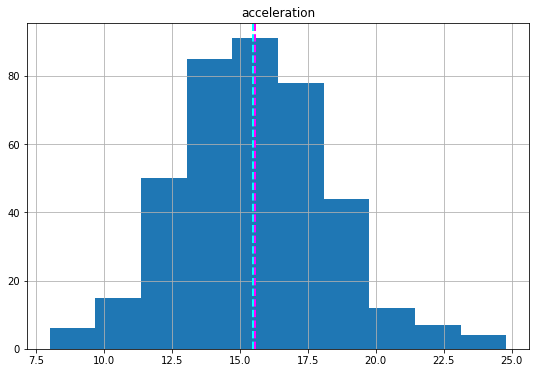

There does not seem to be a text-book normal distribution in each of the variables, except for acceleration, but the mean and median typically do not stray too much from each other.

Now let's explore categorical features. Rather then using histograms we can use bar charts for these.

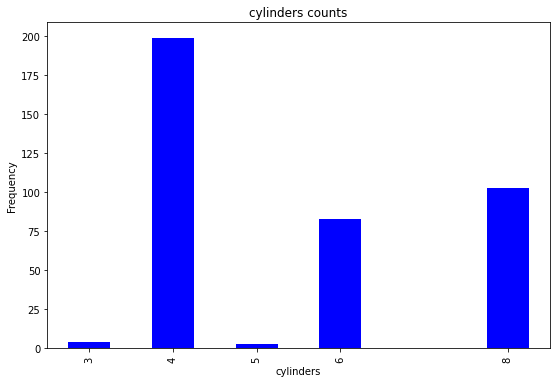

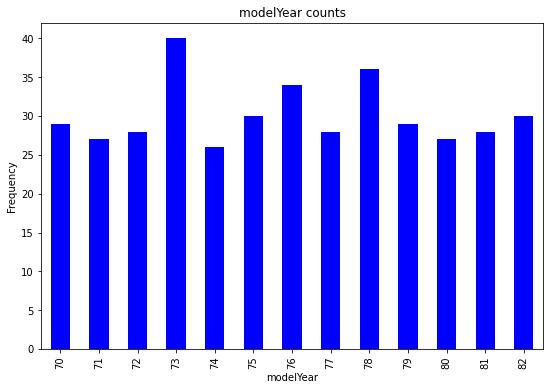

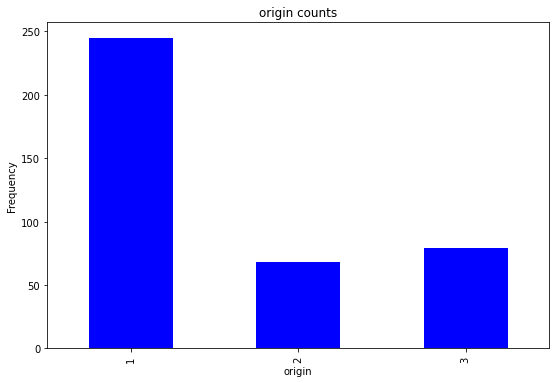

If we look at these charts, we notice:
- cylinders - most cars have 4 cylinders, then 6 and 8, and there are very few cars with 3 or 5
- modelYear - this is almost uniformly distributed
- origin - there seems to be a lot of cars from country 1


### Trying to find a relationship

Now that we have better understanding of the distribution of both numerical, and categorical values, we can try to find correlation between the `mpg` and the numerical features.

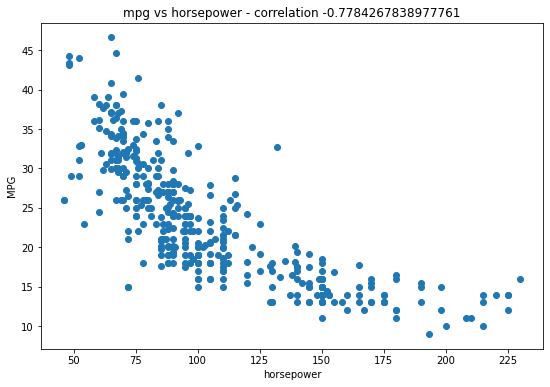

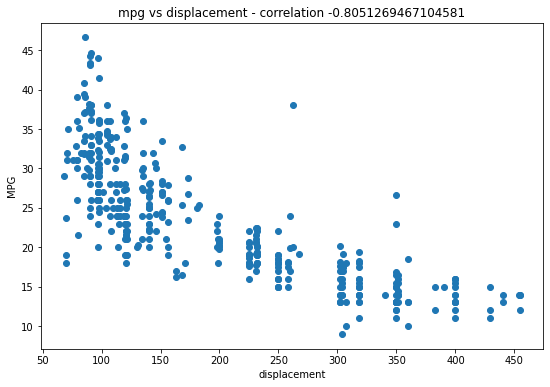

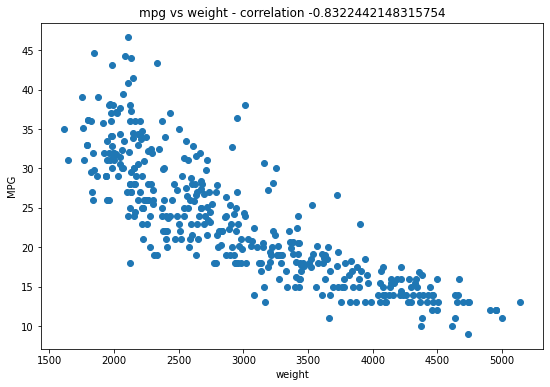

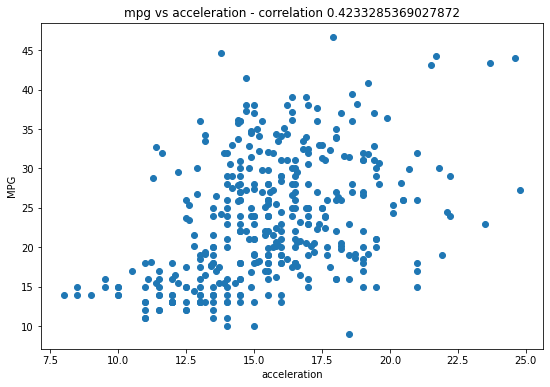

For horsepower (-0.78), displacement (-0.81), and weight (-0.83) there seems to be negative strong correlation. This means that the higher the value for any of these features, the less the mpg. Which makes sense, because if the horsepower and displacement is big, the more fuel the car consumes. The same logic applies to the weight of the car.

The next step is to compare the categorical features with the label.

We shall use boxplots to understand them better. Here is an illustration:

![BoxPlot](https://images.nagwa.com/figures/explainers/812192146073/1.svg)

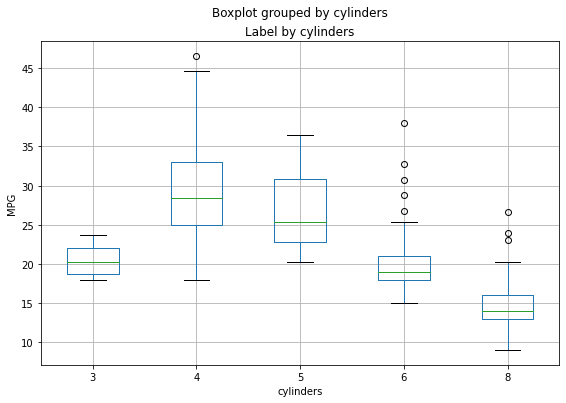

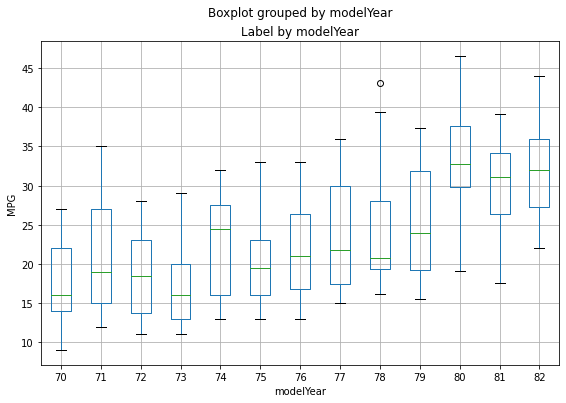

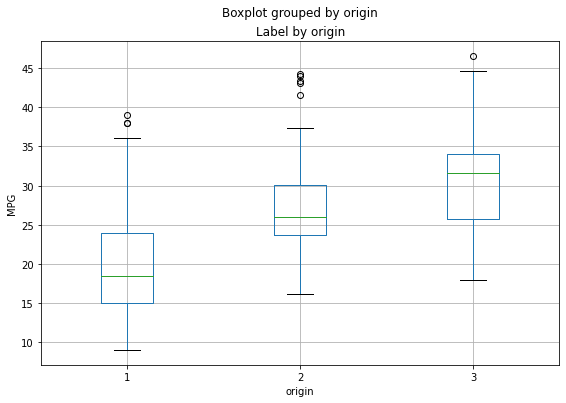

If we look at these charts we can see that:
- cars with fewer cylinders have greater mpg
- it looks like more recent models have better mpg
- the country of origin has also an affect on the mpg, snce it seems that cars produced in country 1 are less efficient than cars produced in country 3.

## Training a Regression Model

After having better understanding of the data, we can use our knowledge to train a regression model that uses the features we have studied to predict the `mpg`.

### Preparing the data

First step is to separate the features from the label.

Features : [[8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00]]
Labels : [18. 15. 18. 16. 17.]


Now we have variable `X` with all the features, and variable `y` with our label (target).

When training a model in machine learning, we always split the dataset in two parts:
- training data - this is typically the larger set of data that is used to train the model with
- test data - this is typically smaller than the training data, and the model does not have access to it whilst it is training. This dataset is used to evaluate the performance of our model, by comparing the predicted labels with the actual labels that were previously unseen by the model.

Data must be split *randomly*, this ensures that the model is trained on data that does not have inherent patterns according to sorting.

We can use `train_test_split` function from the `scikit-learn` library.

Training set 274 rows
Test set 118 rows


By using `train_test_split` we ended up with four datasets:
- X_train - the feature values that we will use to train the model
- y_train - the labels corresponding to X_train that will be used to train the model
- X_test - the feature values that will be used to validate the model
- y_test - the corresponding label to X_test that will be used to validate the model

### Creating a model 

In this case we will create a *linear regression* model. This is a good starting point to find a linear relationship between `X` and `y`. 

LinearRegression()


### Evaluate the model

Now that the model is created, we can use it to predict the labels for the `x_test`. 

Predicted labels: [26. 26. 11. 32. 33. 23. 34. 26. 20. 27.]
Actual labels: [28.  22.3 12.  38.  33.8 19.4 38.1 30.  20.  20. ]


We can look at the predicted value and comparing it with the actual value, but this will take a long time to do. 

We can do better by using scatter plots to compare the predictions with the labels.

 
0.8132 x + 3.927


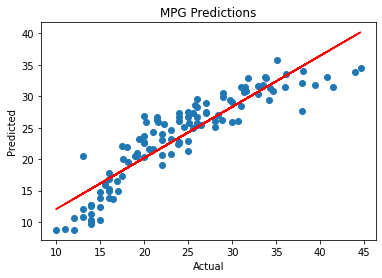

It looks like there is a diagonal trend; the predicted and the actual values are generally following that path, but there is a difference between the line and the results.

This difference (variance) represents the residuals of the model - the distance between the actual label and the predicted label. We can evaluate these residuals and generate evaluation metrics to measure the suitability of our model.

|Measure|Description|
| --- | --- |
|Mean Square Error (MSE) | First every difference from each actual value to the predicted value is found, then this value is squared. Finally, the mean of all these values is taken. In this case the smaller then mean, the better the model is.|
|Root Mean Square Error (RMSE)| This is obtained by applying square root on MSE. Once again the smaller the difference, the better the model.|
|Coefficient of Determination (R-squared)| The higher the value the better fit of the model. It shows how much of the variance between the predicted and the actual values, the model is able to explain.

MSE:  11.125530446601504
RMSE:  3.3354955323911772
R2:  0.8191428142279118


It's convenient to use RMSE to determine the suitability of our model, since it uses the same units (since it's square root). In this case the RMSE is 3.34, this means that if we predict a value there is a chance of it being accurate +/- 3.34. So if we predict a car of having MPG of 12, in reality this can vary from 8.66 to 15.34.

If we look at the R-squared it is telling us that our model is capable of representing 82% of the data.

end